In [1]:
from evo import *
from keras_plots import *
import matplotlib.pyplot as plt

# ejemplo sencillo  base

In [2]:
population_size = 10
chromosome_length = 2
n_generations = 10
n_save_best_population = 2

ga = GeneticAlgorithm(
    initial_population=initial_population(population_size, chromosome_length),
    fitness_function=fitness_function,
    selection_function=selection_function,
    crossover_function=crossover_function,
    mutation_function=mutation_function,
    immigration_function=lambda: immigration_function(population_size, chromosome_length),
    n_generations=n_generations,
    n_save_best_population=n_save_best_population
)

best_solution = ga.run()
print("Best solution: ", best_solution)
print("fitness : ", fitness_function([best_solution]))


Best solution:  [1. 1.]
fitness :  [2.]


# ejemplo sencillo con keras

In [5]:
X, Y = generate_data(10)
X.shape, Y.shape

((10, 1), (10, 1))

In [6]:
population_size = 4
n_generations = 2
n_save_best_population = 1
epochs=5
# assuming that X and Y are your data
ga = GeneticAlgorithm(
    initial_population=initial_population_keras(population_size),
    fitness_function=lambda population: fitness_function_keras(population, X, Y,epochs=epochs),
    selection_function=selection_function_keras,
    crossover_function=crossover_function,
    mutation_function=mutation_function,
    immigration_function=lambda: initial_population_keras(population_size),
    n_generations=n_generations,
    n_save_best_population=n_save_best_population
)

best_solution = ga.run()
print("Best solution: ", best_solution)
print("Val_loss: ", fitness_function_keras(np.expand_dims(best_solution, axis=0),X,Y))


KeyboardInterrupt: 

# keras_plots analisis performance

In [6]:
X, Y = generate_data(10)
X.shape, Y.shape

((10, 1), (10, 1))

In [7]:
population_size = 4
n_generations = 2
n_save_best_population = 1
epochs=1
initial_population = initial_population_keras(population_size)

# assuming that X and Y are your data
ga = GeneticAlgorithm(
    initial_population=initial_population,
    fitness_function=lambda population: fitness_function_keras(population, X, Y,epochs=epochs),
    selection_function=selection_function_keras,
    crossover_function=crossover_function,
    mutation_function=mutation_function,
    immigration_function=lambda: initial_population_keras(population_size),
    n_generations=n_generations,
    n_save_best_population=n_save_best_population
)

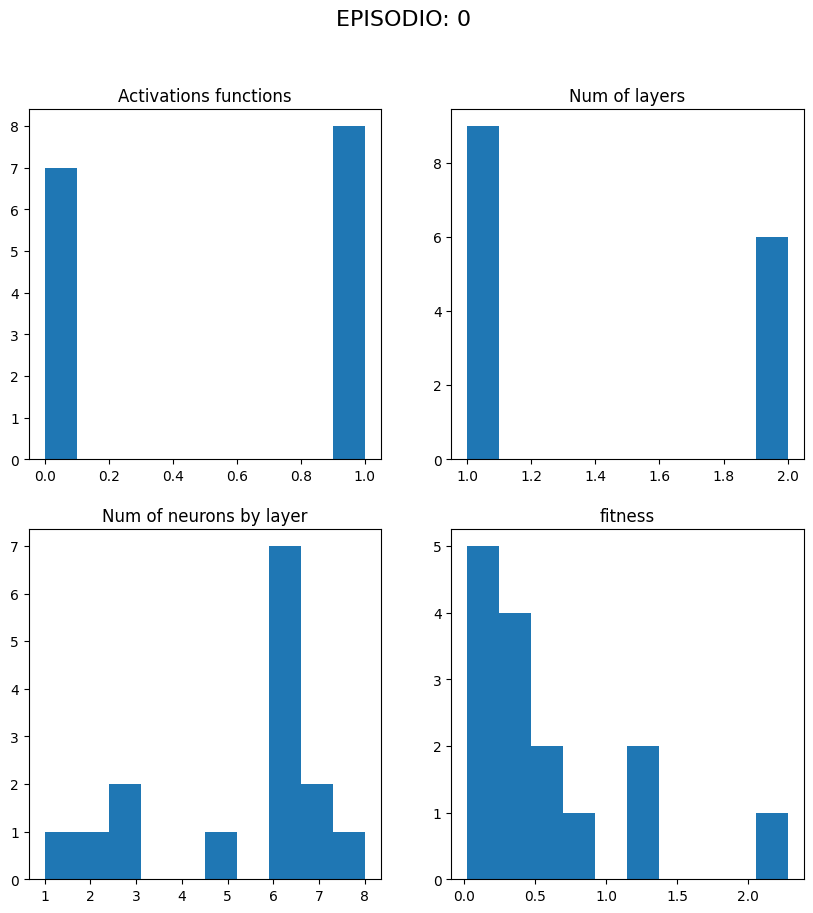

In [8]:
n_episodios = 1

for i in range(n_episodios):
    
    # ENTRENAMOS N GENERACIONES
    best_solution = ga.run()
    
    fig , axs = plt.subplots(2,2, figsize=(10,10))

    axs[0,0].hist(ga.population[:,0])
    axs[0,0].set_title('Activations functions')

    axs[0,1].hist(ga.population[:,1])
    axs[0,1].set_title('Num of layers')

    axs[1,0].hist(ga.population[:,2])
    axs[1,0].set_title('Num of neurons by layer')

    axs[1,1].hist(ga.fitness)
    axs[1,1].set_title('fitness')

    fig.suptitle('EPISODIO: ' + str(i), fontsize=16)


    plt.show()

    """
    # CREAMOS MODELOS DEL EPISODIO PARA ANALIZAR ( Un EPISODIO SON N GENERACIONES)
    
    my_models = []
    for i in range(ga.population.shape[0]):
        my_models.append( create_model(ga.population[i]) )


    activation_functions = get_activation_functions(my_models, 0)  # for the first layer
    plot_histogram(activation_functions, 'Distribution of Activation Function layer 0', 'Activation Function')

    activation_functions = get_activation_functions(my_models, 1)
    plot_histogram(activation_functions, 'Distribution of Activation Function layer 1', 'Activation Function')

    neurons = get_neurons(my_models, 0)  # for the first layer
    plot_histogram(neurons, 'Distribution of Neurons layer 0', 'Number of Neurons')

    neurons = get_neurons(my_models, 1)  # for the first layer
    plot_histogram(neurons, 'Distribution of Neurons layer 1', 'Number of Neurons')

    num_layers = get_number_of_layers(my_models)
    plot_histogram(num_layers, 'Distribution of Number of Layers', 'Number of Layers')
    """
    
